In [25]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
from sklearn.model_selection import train_test_split

In [46]:
import matplotlib.pyplot as plt  

# Importing data 

In [26]:
df = pd.DataFrame()
df = pd.read_csv('heart_disease.csv')

In [30]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Preprocessing 

In [31]:
Heart_dis = df.iloc[:, 0]

In [34]:
df.pop('HeartDiseaseorAttack')

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [37]:
X_train = []
Y_train = []
X_test = []
Y_test = []
X_train, X_test, Y_train, Y_test = train_test_split(df, Heart_dis, test_size=0.20, random_state=0)

In [38]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
160780,0.0,0.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,7.0,5.0,7.0
249661,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,10.0,0.0,0.0,0.0,3.0,5.0,6.0
26769,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
182771,1.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,10.0,1.0,0.0,13.0,4.0,7.0
117116,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
117952,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0
173685,1.0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,10.0,7.0,1.0,0.0,13.0,4.0,6.0
43567,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,12.0,5.0,7.0


In [39]:
Y_train

160780    0.0
249661    0.0
26769     0.0
182771    0.0
117116    0.0
         ... 
176963    0.0
117952    0.0
173685    1.0
43567     1.0
199340    0.0
Name: HeartDiseaseorAttack, Length: 202944, dtype: float64

In [40]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
198433,0.0,0.0,1.0,45.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,3.0,0.0,0.0,4.0,5.0,1.0
162094,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,4.0,8.0
81877,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,7.0
137629,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,7.0
138898,1.0,1.0,1.0,34.0,1.0,0.0,2.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22855,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,4.0,0.0,0.0,1.0,7.0,4.0,8.0
121922,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1.0,10.0,5.0,5.0
232355,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,10.0,0.0,0.0,0.0,9.0,6.0,8.0
208496,1.0,0.0,1.0,28.0,1.0,0.0,2.0,1.0,0.0,1.0,...,0.0,1.0,4.0,30.0,10.0,0.0,0.0,7.0,6.0,1.0


In [41]:
Y_test

198433    0.0
162094    0.0
81877     0.0
137629    0.0
138898    0.0
         ... 
22855     0.0
121922    0.0
232355    0.0
208496    0.0
232431    0.0
Name: HeartDiseaseorAttack, Length: 50736, dtype: float64

# Training our model in Logistic Regression 

In [42]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/Users/kedarnandiwdekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
model.score(X_test, Y_test)

0.9082702617470829

In [45]:
confusion_matrix(Y_test, model.predict(X_test))

array([[45536,   428],
       [ 4226,   546]])

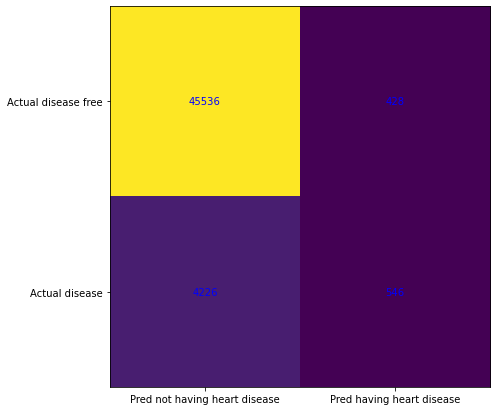

In [52]:
mat = confusion_matrix(Y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(mat)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred not having heart disease', 'Pred having heart disease'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual disease free', 'Actual disease'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, mat[i, j], ha='center', va='center', color='blue')
plt.show()

